<a href="https://colab.research.google.com/github/priaJuli/IR_Pilkada2017/blob/main/IR_pilkada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
import pandas as pd

pd.options.display.max_colwidth = 300

In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# nltk
# from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer 
   
ps = PorterStemmer() 

In [4]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
url = 'https://raw.githubusercontent.com/priaJuli/IR_research/main/dataset_tweet_sentiment_pilkada_DKI_2017.csv'
# Importing the dataset
DATASET_COLUMNS=['Id','target','Pasangan Calon','text']
# ['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(url, names=DATASET_COLUMNS, skiprows=[0])

df["target"] = (df['target'] == "positive").astype(int)

df.head()

,Id,target,Pasangan Calon,text
0,1,0,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh
1,2,0,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk
2,3,0,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..
3,4,0,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017
4,5,0,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa


In [6]:
df.sample(5)

,Id,target,Pasangan Calon,text
679,680,0,Anies-Sandi,"Bismillah beli rumah DP 0%, awas aja program ga jadi jalan #GubernurBaru #aniessandi"
319,320,0,Ahok-Djarot,"Kalau Ahok lawannya Djarot, aku mungkin pilih Djarot karena memang Ahok perlu belajar lebih baik mengenai humas dan diplomasi #PilkadaDKI201"
653,654,0,Anies-Sandi,sedikit pun kami tidak pernah #AniesSandi menjanjikan rumah DP 0% itu berbentuk #Rusun yang kami tau rumah berbentuk horisontal #SaveDP0%
784,785,1,Anies-Sandi,"Aku asli suku betawi, aku akan pilih pemimpin muslim yang akan jadi pemimpin Jakarta #pilkadadki2017 #pilkadajakarta ALLAHUAKBAR 3x !!"
87,88,0,Agus-Sylvi,Gagal di Pilkada DKI Jakarta AHY Diisukan Maju ke Pilgub Jatim https://goo.gl/fb/ECcmdW #headlines #politikbirokrasi #pilkadadki


In [7]:
df.columns

Index(['Id', 'target', 'Pasangan Calon', 'text'], dtype='object')

In [8]:
print('length of data is', len(df))

length of data is 900


In [9]:
df.shape

(900, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              900 non-null    int64 
 1   target          900 non-null    int64 
 2   Pasangan Calon  900 non-null    object
 3   text            900 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.2+ KB


In [11]:
df.dtypes

Id                 int64
target             int64
Pasangan Calon    object
text              object
dtype: object

In [12]:
df.isnull().sum()

Id                0
target            0
Pasangan Calon    0
text              0
dtype: int64

In [13]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:     ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:      900


In [14]:
df['target'].unique()

array([0, 1])

In [15]:
df['target'].nunique()

2

         Id  Pasangan Calon  text
target                           
0       450             450   450
1       450             450   450


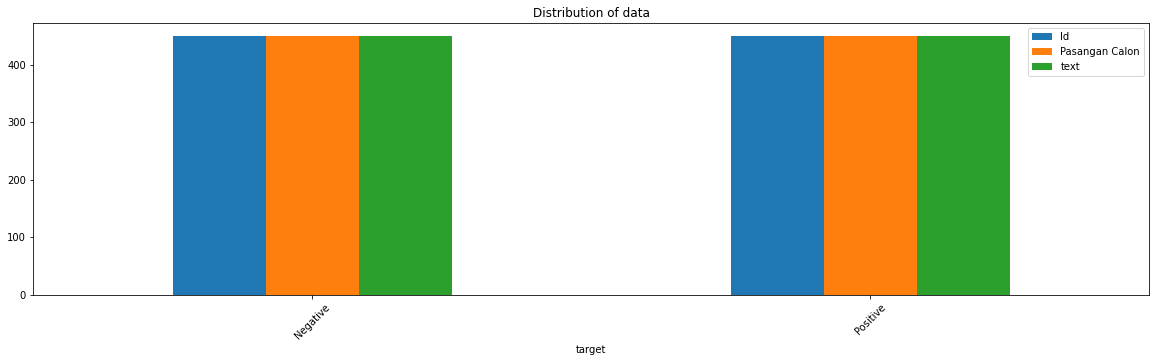

In [16]:
# Plotting the distribution for dataset.
print(df.groupby('target').count())
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=True,figsize=(20, 5))
ax.set_xticklabels(['Negative','Positive'], rotation=45)
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

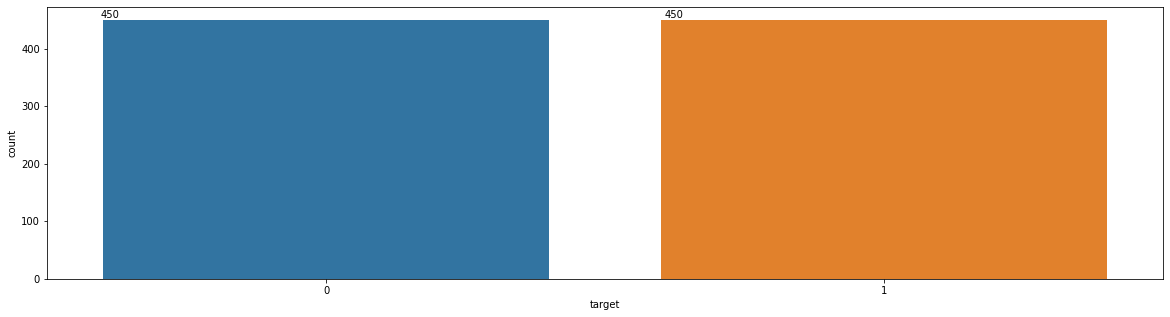

In [17]:
import seaborn as sns
plt.figure(figsize = (20,5))
ax=sns.countplot(x='target', data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

In [18]:
data=df[['text','target']]
data.head()

,text,target
0,Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh,0
1,#agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk,0
2,Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..,0
3,Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017,0
4,Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa,0


In [19]:
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    450
0    450
Name: target, dtype: int64

In [20]:
data['target'].unique()

array([0, 1])

In [21]:
data_pos = data[data['target'] == 1]
data_pos.head()
print(len(data_pos))

450


In [22]:
data_neg = data[data['target'] == 0]
data_neg.head()
print(len(data_neg))

450


In [23]:
data_pos = data_pos.iloc[:]
data_neg = data_neg.iloc[:]
dataset = pd.concat([data_pos, data_neg])
dataset.head()

,text,target
150,Doa ku.. Semoga suaranya mas Agus-Sylvi beneran ke #Badja #PilkadaDKI2017 yakin kan mas Agus.. Aku pada mu..,1
151,"Terima kasih mas @AgusYudhoyono, karenamu anak muda telah berani menyuarakan perubahan. Kami tetap bersamamu #YNWA",1
152,KETEMU DI ISTIQLAL Bangga Pernah Jadi Bagian Dari @AgusYudhoyono dan @sylviana_murni @ZaraZettiraZr @AhyCenter @SohibAHY,1
153,"Tersingkir dari kancah pilkada DKI, rupanya ada cara lain untuk mengangkat seseorang #AHY Mendunia",1
154,"Dalam Pilkada DKI, AHY juga mampu menunjukkan kualitasnya sebagai seorang pemimpin muda yang berjiwa ksatria. (AHY mendunia)",1


In [24]:
dataset['text']=dataset['text'].str.lower()
print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][552])

dataset['text'].sample(5)

aku juga kemarin #ahy 19april2017 suaraku utk paslon 3 #dki
salam untuk kaum muda. hormat pada yang tua. #ahy
ahok menang tipis di tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd  #seruji #fokus #pilkadadki2017
hati hati komentar tentang #ahokdjarot #kalahpilkada, ujung2nya anda dituduh nyinyir
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero https://www.instagram.com/p/bs1x10_bovd/


718       cek kaos para pendukung anies-sandi,kaos2 provokatif yang dipakai saat pilkada dki dipakai dalam syukuran, dan mereka bicara rekonsiliasi
80     ternyata segelintir pendukung ahy merasa ditikung di saat terakhir karena adanya tweet dari akun resmi parpol pendukung anies-sandi #pilkada
752                                                                                      fahri harapkan anies-sandi loyal ke jokowi #pilkadadki2017
586                                                                                                      #ahokdjarot <victory hand> <victory hand> 
697                               bagian 1 .. bukti radikalis pendukung teroris di belakang @aniesbaswedan #aniessandi #ahokdjarot #mencaripemimpin
Name: text, dtype: object

In [25]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 5.0 MB/s 


In [26]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize 
 

stop_factory = StopWordRemoverFactory().get_stop_words()
print(stop_factory)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [27]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_factory])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].sample(5)

ahok menang tipis tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd #seruji #fokus #pilkadadki2017
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero https://www.instagram.com/p/bs1x10_bovd/


105    maksud hati caper ahy/silvy, eh malah kena protes <face with stuck-out tounges> <rolling on the floor laughing> <rolling on the floor laughing>
566                                            positif, pdip usung ahok-djarot pilkada dki 2017 <victory hand> - suara nasional http://fb.me/4wthllcnz
291                                                                                                       keikhlasan berkorban #ahy tak bakal sia2 non
339                                                                                              ohh jadi tertib #ahokdjarot ya, terus gub baru tertib
688                              sangat buruknya klakuan pndukung #aniessandi stelah ceramah politik masjid lanjut takbir pengusiran djarot dri masjid
Name: text, dtype: object

In [28]:
def cleaning_URLs(data):
    return re.sub('http[s]?://\S+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].head()



ahok menang tipis tps tempat habib rizieq mencoblos  #seruji #fokus #pilkadadki2017
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero 


150            doa ku.. semoga suaranya mas agus-sylvi beneran #badja #pilkadadki2017 yakin kan mas agus.. aku mu..
151         terima kasih mas @agusyudhoyono, karenamu anak muda berani menyuarakan perubahan. tetap bersamamu #ynwa
152    ketemu istiqlal bangga pernah jadi bagian @agusyudhoyono @sylviana_murni @zarazettirazr @ahycenter @sohibahy
153                                  tersingkir kancah pilkada dki, rupanya cara mengangkat seseorang #ahy mendunia
154            pilkada dki, ahy mampu menunjukkan kualitasnya seorang pemimpin muda berjiwa ksatria. (ahy mendunia)
Name: text, dtype: object

In [29]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].sample(5)


ahok menang tipis tps tempat habib rizieq mencoblos  seruji fokus pilkadadki2017
duajari ahokdjarot badja salamduajari duajari kode code gangster farmer foodhero 


338                               sangat rasa kehilangan bapak ahok ahok ahokdjarot teman temanahokfair temanahok 
424                              bankdki ikut2an moneypolitic kemenangan ahokdjarot  seenoevil monkey ojkindonesia
334    pkb dukung ahokpenistaagama pilkadadki2017 putaran ke2 siapsiap ditinggalkan pemilih umat islam pemilu 2019
503                       sejuta lilin keadilan ahokdjarot lawinforcement justice jakartauntuksemua indonesiaraya 
393                                                 pembenci pak basuki benci boleh goblok jangan ahokdjarot badja
Name: text, dtype: object

In [30]:

def cleaning_repeating_char(text):
    return ' '.join(dict.fromkeys(text.split()))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
print(dataset['text'][305])
print(dataset['text'][552])


ahok menang tipis tps tempat habib rizieq mencoblos seruji fokus pilkadadki2017
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


In [31]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][552])
dataset['text'].head()

aku kemarin ahy april suaraku utk paslon  dki
salam kaum muda hormat tua ahy
ahok menang tipis tps tempat habib rizieq mencoblos seruji fokus pilkadadki
hati komentar ahokdjarot kalahpilkada ujungnya dituduh nyinyir
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


150                       doa ku semoga suaranya mas agussylvi beneran badja pilkadadki yakin kan agus aku mu
151       terima kasih mas agusyudhoyono karenamu anak muda berani menyuarakan perubahan tetap bersamamu ynwa
152    ketemu istiqlal bangga pernah jadi bagian agusyudhoyono sylvianamurni zarazettirazr ahycenter sohibahy
153                              tersingkir kancah pilkada dki rupanya cara mengangkat seseorang ahy mendunia
154              pilkada dki ahy mampu menunjukkan kualitasnya seorang pemimpin muda berjiwa ksatria mendunia
Name: text, dtype: object

In [32]:
# import nltk
# st = nltk.PorterStemmer()

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
st = factory.create_stemmer()

def stemming_on_text(data):
    return st.stem(data)
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))

print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][552])

dataset['text'].head()



aku kemarin ahy april suara utk paslon dki
salam kaum muda hormat tua ahy
ahok menang tipis tps tempat habib rizieq coblos ruji fokus pilkadadki
hati komentar ahokdjarot kalahpilkada ujung tuduh nyinyir
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


150                          doa ku moga suara mas agussylvi beneran badja pilkadadki yakin kan agus aku mu
151                       terima kasih mas agusyudhoyono karena anak muda berani suara ubah tetap sama ynwa
152    ketemu istiqlal bangga pernah jadi bagi agusyudhoyono sylvianamurni zarazettirazr ahycenter sohibahy
153                                             singkir kancah pilkada dki rupa cara angkat orang ahy dunia
154                              pilkada dki ahy mampu tunjuk kualitas orang pimpin muda jiwa ksatria dunia
Name: text, dtype: object

In [33]:
import nltk

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lm = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
ahok menang tipis tps tempat habib rizieq coblos ruji fokus pilkadadki
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


150                          doa ku moga suara mas agussylvi beneran badja pilkadadki yakin kan agus aku mu
151                       terima kasih mas agusyudhoyono karena anak muda berani suara ubah tetap sama ynwa
152    ketemu istiqlal bangga pernah jadi bagi agusyudhoyono sylvianamurni zarazettirazr ahycenter sohibahy
153                                             singkir kancah pilkada dki rupa cara angkat orang ahy dunia
154                              pilkada dki ahy mampu tunjuk kualitas orang pimpin muda jiwa ksatria dunia
Name: text, dtype: object

In [34]:


X=dataset.text
X.sample(5)
y=dataset.target
y.sample(5)

263    1
393    0
310    0
562    1
844    1
Name: target, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720,), (180,), (720,), (180,))

In [36]:
# vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=50000)
# vectoriser.fit(X)
# print('No. of feature_words: ', len(vectoriser.get_feature_names()))
vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=50000)
vectoriser.fit(X)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  2852


In [37]:
X_train = vectoriser.transform(X_train)
X_train

<720x2852 sparse matrix of type '<class 'numpy.float64'>'
	with 7776 stored elements in Compressed Sparse Row format>

In [38]:
X_test  = vectoriser.transform(X_test)
X_test



scorvar = ["accuracy", "precision", "recall", "f1"]
# X_train = vectoriser.transform(X)
# X_train
# y_train = y

In [39]:
def model_Evaluate(model,X_test,y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    # print(cf_matrix)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.4%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    # print(group_percentages)
    labels = [f'{v1} : {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Best split ratio 20%, random state 42
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        86
           1       0.80      0.83      0.81        94

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

hello


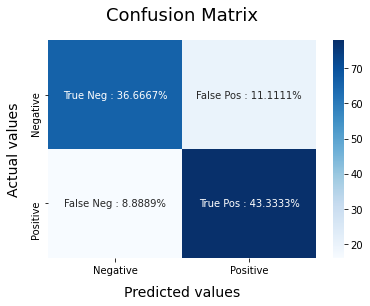

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("Best split ratio 20%, random state 42")
X_train = vectoriser.transform(X_train)
X_train
# print(X_train[0])
X_test = vectoriser.transform(X_test)
X_test
PAClass = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)

PAClass.fit(X_train, y_train)

model_Evaluate(PAClass,X_test,y_test)

y_pred5 = PAClass.predict(X_test)
print("hello")

Best split ratio 10%, random state 42
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        42
           1       0.76      0.79      0.78        48

    accuracy                           0.76        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.76      0.76      0.76        90

hello


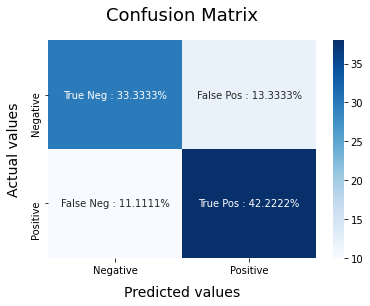

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("Best split ratio 10%, random state 42")
X_train = vectoriser.transform(X_train)
X_train
# print(X_train[0])
X_test = vectoriser.transform(X_test)
X_test
PAClass = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)

PAClass.fit(X_train, y_train)

model_Evaluate(PAClass,X_test,y_test)

y_pred5 = PAClass.predict(X_test)
print("hello")

Best split ratio 20%, random state 42
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        86
           1       0.78      0.82      0.80        94

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

hello


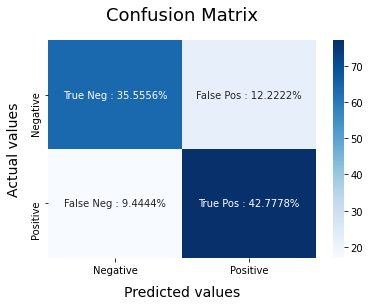

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("Best split ratio 20%, random state 42")
X_train = vectoriser.transform(X_train)
X_train
# print(X_train[0])
X_test = vectoriser.transform(X_test)
X_test
PAClass = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)

PAClass.fit(X_train, y_train)

model_Evaluate(PAClass,X_test,y_test)

y_pred5 = PAClass.predict(X_test)
print("hello")

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       129
           1       0.77      0.79      0.78       141

    accuracy                           0.76       270
   macro avg       0.76      0.76      0.76       270
weighted avg       0.76      0.76      0.76       270

hello


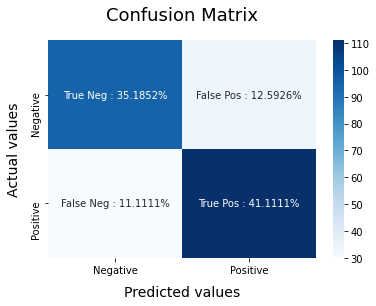

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# print("Best split ratio 20%, random state 42")
X_train = vectoriser.transform(X_train)
X_train
# print(X_train[0])
X_test = vectoriser.transform(X_test)
X_test
PAClass = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)

PAClass.fit(X_train, y_train)

model_Evaluate(PAClass,X_test,y_test)

y_pred5 = PAClass.predict(X_test)
print("hello")

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       169
           1       0.74      0.78      0.76       191

    accuracy                           0.74       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.74      0.74      0.74       360

hello


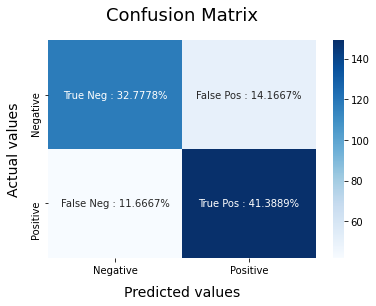

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# print("Best split ratio 20%, random state 42")
X_train = vectoriser.transform(X_train)
X_train
# print(X_train[0])
X_test = vectoriser.transform(X_test)
X_test
PAClass = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)

PAClass.fit(X_train, y_train)

model_Evaluate(PAClass,X_test,y_test)

y_pred5 = PAClass.predict(X_test)
print("hello")

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       213
           1       0.70      0.71      0.71       237

    accuracy                           0.69       450
   macro avg       0.69      0.69      0.69       450
weighted avg       0.69      0.69      0.69       450

hello


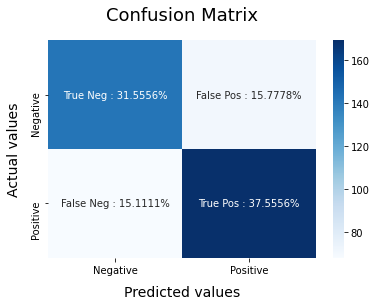

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5,random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# print("Best split ratio 20%, random state 42")
X_train = vectoriser.transform(X_train)
X_train
# print(X_train[0])
X_test = vectoriser.transform(X_test)
X_test
PAClass = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)

PAClass.fit(X_train, y_train)

model_Evaluate(PAClass,X_test,y_test)

y_pred5 = PAClass.predict(X_test)
print("hello")